In [27]:
from pathlib import Path
import math

import pandas as pd
import matplotlib.pyplot as plt

## Multiple replications
Since our clinic opens and closes every day, it is technically known as a *terminating simulation*. For such simulations, we would usually run them multiple times to generate independent samples of our performance metrics (patient wait times, resource utilizations, ...). 

In [9]:
stats_time_in_system = patient_log_df.groupby(['rep_num'])['time_in_system'].describe()
stats_time_in_system

,count,mean,std,min,25%,50%,75%,max
rep_num,,,,,,,,
1,1802.0,21.867026,1.656333,18.449408,20.632561,21.626386,22.768996,28.898145
2,1860.0,22.050282,1.722174,18.237476,20.765855,21.804608,23.030550,29.907327
3,1806.0,22.145612,1.705596,18.498279,20.888379,21.893112,23.090498,29.835368
4,1832.0,22.053212,1.875127,18.563163,20.693459,21.738838,23.040274,32.012387
5,1812.0,22.038333,1.855168,18.091914,20.753181,21.697945,23.017748,32.463663
6,1830.0,21.895404,1.726663,18.411113,20.629079,21.601089,22.817487,30.206782
7,1806.0,21.916590,1.722780,18.445669,20.673198,21.621243,22.924543,30.982546
8,1814.0,22.169455,2.031675,18.415250,20.679077,21.806067,23.155278,32.834910
9,1796.0,21.985817,1.806984,18.558141,20.635541,21.661523,23.051881,31.598218


Usually when doing simulation output analysis of terminating simulations, we want to give some sense of our uncertainty about summary statistics. We do this through confidence intervals (CI). In order to compute an approximate 95% CI on the mean time in system, we compute the mean (let's call it $\bar{Y}$) and standard deviation of the `mean` column (let's call it $S$) in the above output of `describe`. Then our CI is:

$$
\bar{Y} \pm 1.96 \frac{S}{\sqrt{n}}
$$

where $n$ is the number of simulation replications and the $1.96$ is the 97.5th percentile of the standard normal distribution (since we are building a 95% CI, we want 2.5% outside of the upper and lower limits). You might recall from your basic statistics course that $\frac{S}{\sqrt{n}}$ is called the *standard error* and that $1.96 \frac{S}{\sqrt{n}}$ is called the *half-width* of the CI. What's nice about doing simulation is that we can make the half-width narrower but just running more replications (and getting a more precise estimate of our mean performance measure).

In [13]:
n = stats_time_in_system['mean'].count()
n

10

In [14]:
Y_bar = stats_time_in_system['mean'].mean()
Y_bar

21.98252371994302

In [15]:
S = stats_time_in_system['mean'].std()
S

0.14038909784631295

In [17]:
(Y_bar - 1.96 * S / math.sqrt(n), Y_bar + 1.96 * S / math.sqrt(n))

(21.895509655604307, 22.069537784281735)

In [22]:
patient_log_ci = {'wait_for_greeter': {'n_samples': 15, 'mean_mean': 0.00039147138861099956, 'sd_mean': 0.00017968514566094577, 'ci_95_lower': 0.00030053815858812184, 'ci_95_upper': 0.0004824046186338773}, 
                  'wait_for_reg': {'n_samples': 15, 'mean_mean': 0.5150057437830473, 'sd_mean': 0.14876952145199646, 'ci_95_lower': 0.4397179782594883, 'ci_95_upper': 0.5902935093066063}, 
                  'wait_for_vaccinator': {'n_samples': 15, 'mean_mean': 0.23218535374169788, 'sd_mean': 0.07247168570512783, 'ci_95_lower': 0.19550962051884624, 'ci_95_upper': 0.2688610869645495}, 
                  'wait_for_scheduler': {'n_samples': 15, 'mean_mean': 0.010627915542235657, 'sd_mean': 0.002877315630484159, 'ci_95_lower': 0.009171792927799058, 'ci_95_upper': 0.012084038156672257}, 
                  'time_in_system': {'n_samples': 15, 'mean_mean': 21.99214065499819, 'sd_mean': 0.17851248017993054, 'ci_95_lower': 21.90180087558879, 'ci_95_upper': 22.082480434407593}}

In [25]:
pd.set_option("display.precision", 3)
pd.set_option('display.max_columns', None)  
pd.DataFrame(patient_log_ci)

,wait_for_greeter,wait_for_reg,wait_for_vaccinator,wait_for_scheduler,time_in_system
n_samples,1.500e+01,15.000,15.000,15.000,15.000
mean_mean,3.915e-04,0.515,0.232,0.011,21.992
sd_mean,1.797e-04,0.149,0.072,0.003,0.179
ci_95_lower,3.005e-04,0.440,0.196,0.009,21.902
ci_95_upper,4.824e-04,0.590,0.269,0.012,22.082


In [30]:
!python ../src/vaccine_clinic/vaccine_clinic_model4.py --config ../src/vaccine_clinic/input/base_g3r3v15s3.cfg

Namespace(config=None, num_greeters=3, num_reg_staff=3, num_reps=15, num_schedulers=3, num_vaccinators=15, obs_time=15.0, output_path='output', patient_arrival_rate=180.0, pct_need_second_dose=0.5, post_obs_time_mean=1.0, quiet=True, reg_time_mean=1.0, scenario='base_g3r3v15s3', sched_time_mean=1.0, sched_time_sd=0.1, seed=4470, stoptime=600.0, temp_check_time_mean=0.25, temp_check_time_sd=0.05, vaccinate_time_mean=4.0, vaccinate_time_sd=0.5)
1929 patients processed.
Simulation replication 1 ended at time 676.6043213433082
1910 patients processed.
Simulation replication 2 ended at time 640.1933033369421
1799 patients processed.
Simulation replication 3 ended at time 643.9666158544434
1794 patients processed.
Simulation replication 4 ended at time 628.8287275922174
1809 patients processed.
Simulation replication 5 ended at time 630.6335388969391
1832 patients processed.
Simulation replication 6 ended at time 661.923202349701
1785 patients processed.
Simulation replication 7 ended at tim

In [35]:
patient_log_df_g3r3v15s3 = pd.read_csv('output/consolidated_clinic_patient_log_base_g3r3v15s3.csv')

In [36]:
stats_time_in_system_g3r3v15s3 = patient_log_df_g3r3v15s3.groupby(['rep_num'])['time_in_system'].describe()
stats_time_in_system_g3r3v15s3

,count,mean,std,min,25%,50%,75%,max
rep_num,,,,,,,,
1.0,1929.0,49.043,14.894,19.699,35.984,52.857,62.229,75.489
2.0,1910.0,33.722,7.008,19.023,28.275,32.738,38.923,55.495
3.0,1799.0,41.317,10.009,19.027,32.943,44.706,49.662,61.667
4.0,1794.0,31.740,6.274,19.178,27.359,30.976,35.906,49.280
5.0,1809.0,28.626,4.820,18.865,24.910,28.061,32.681,43.897
6.0,1832.0,35.945,11.390,18.999,26.849,32.168,44.050,65.553
7.0,1785.0,48.814,9.715,20.630,45.179,49.815,55.318,68.564
8.0,1745.0,24.487,2.909,18.563,22.258,24.092,26.318,37.304
9.0,1777.0,28.230,4.391,18.791,24.556,28.276,31.888,39.612


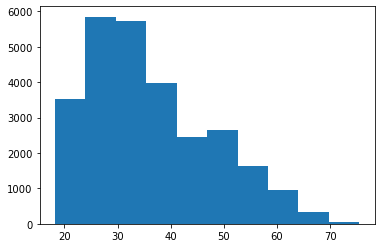

In [37]:
plt.hist(patient_log_df_g3r3v15s3['time_in_system']);